## Kutu Grafikleri
Tahmini süre: 45 dakika

Bu laboratuvar çalışmasında, verilerin görselleştirilmesine odaklanacaksınız. Veri seti bir RDBMS aracılığıyla sağlanacak ve gerekli verileri çıkarmak için SQL sorguları kullanmanız gerekecektir.

Hedefler
Bu laboratuvar çalışmasında şunları gerçekleştireceksiniz:

Verilerin dağılımını görselleştirmek.

İki özellik arasındaki ilişkiyi görselleştirmek.

Kutu grafikleri kullanarak veri bileşimini ve karşılaştırmalarını görselleştirmek.

***Kurulum: Veritabanına Bağlanma***

***1. Veritabanı Dosyasını İndirin***

In [28]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2026-02-03 08:34:55--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite.3’

survey-results-publ 100%[===================>] 201.62M  70.9MB/s    in 2.8s    

2026-02-03 08:35:00 (70.9 MB/s) - ‘survey-results-public.sqlite.3’ saved [211415040/211415040]



***2. Veritabanına Bağlanın***
Gerekli kütüphaneleri yükleyin

In [29]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')

# Demo: Temel SQL Sorguları
***Demo 1: Tablodaki Satır Sayısını Sayma***

In [31]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)

   COUNT(*)
0     65437


***Demo 2: Tüm Tabloları Listele***

In [32]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


***Demo 3: Verileri Yaşa Göre Gruplandırma***

In [33]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)

                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


# Verileri Görselleştirme
***Görev 1: Verilerin Dağılımını Görselleştirme***

***1. Toplam Ücretin (CompTotal) Kutu Grafiği**

Toplam ücretin dağılımını ve aykırı değerlerini analiz etmek için bir kutu grafiği kullanın.

       CompTotal
0      2040000.0
1        28000.0
2        85000.0
3        50000.0
4       110000.0
...          ...
33735    36000.0
33736    40000.0
33737    61000.0
33738    58000.0
33739    55000.0

[33740 rows x 1 columns]
ust sınır: 3600000.0


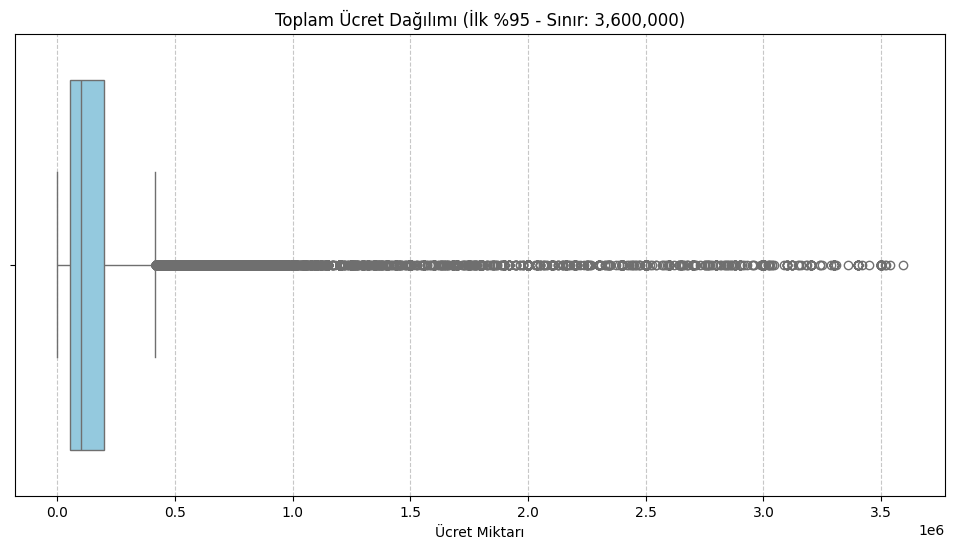

In [34]:
# 1. Veriyi çekelim (Bağlantın açıksa bu adımı hızlı geçebilirsin)
QUERY = "SELECT CAST(CompTotal AS FLOAT) as CompTotal FROM main WHERE CompTotal IS NOT NULL"
df_comp = pd.read_sql_query(QUERY, conn)
print(df_comp)


# 2. AYKIRI DEĞERLERİ SINIRLAYALIM
# Maaşların %95'lik kısmının üst sınırını bulalım (Genelde mantıklı olan budur)
ust_sinir = df_comp['CompTotal'].quantile(0.95)
print('ust sınır:', ust_sinir)

# Sadece bu sınırın altındakileri alalım (Grafiğin "patlamaması" için)
df_filtered = df_comp[df_comp['CompTotal'] < ust_sinir]

# 3. Görselleştirme
plt.figure(figsize=(12, 6))

# Filtrelenmiş veriyle çiziyoruz
sns.boxplot(data=df_filtered,  x='CompTotal', color='skyblue')

plt.title(f'Toplam Ücret Dağılımı (İlk %95 - Sınır: {ust_sinir:,.0f})')
plt.xlabel('Ücret Miktarı')

# Grafiği daha net görmek için grid ekleyelim
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

***2. Yaşın Kutu Grafiği (sayısal değerlere dönüştürülmüş)***

Yaş sütununu sayısal değerlere dönüştürün ve dağılımı görselleştirin.

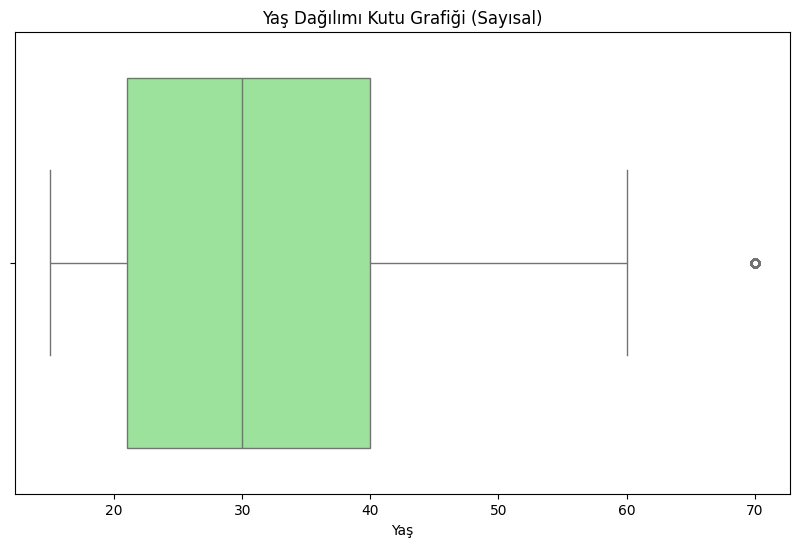

In [35]:
# 1. SQL ile Age verilerini çekelim
QUERY = "SELECT Age FROM main WHERE Age IS NOT NULL"
df_age = pd.read_sql_query(QUERY, conn)

# 2. Metin yaşları sayıya dönüştürelim
age_mapping = {
    'Under 18 years old': 15,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}
# 'Prefer not to say' gibi değerler NaN (boş) olacak, onları atacağız
df_age['Age_Numeric'] = df_age['Age'].map(age_mapping)
df_age_clean = df_age.dropna(subset=['Age_Numeric'])

# 3. Görselleştirme
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_age_clean['Age_Numeric'], color='lightgreen')

plt.title('Yaş Dağılımı Kutu Grafiği (Sayısal)')
plt.xlabel('Yaş')
plt.show()

# Görev 2: Verilerdeki İlişkileri Görselleştirme
***1. Yaş Gruplarına Göre Gruplandırılmış Toplam Ücretin Kutu Grafiği:***

Ücretin farklı yaş gruplarına göre dağılımını görselleştirin.

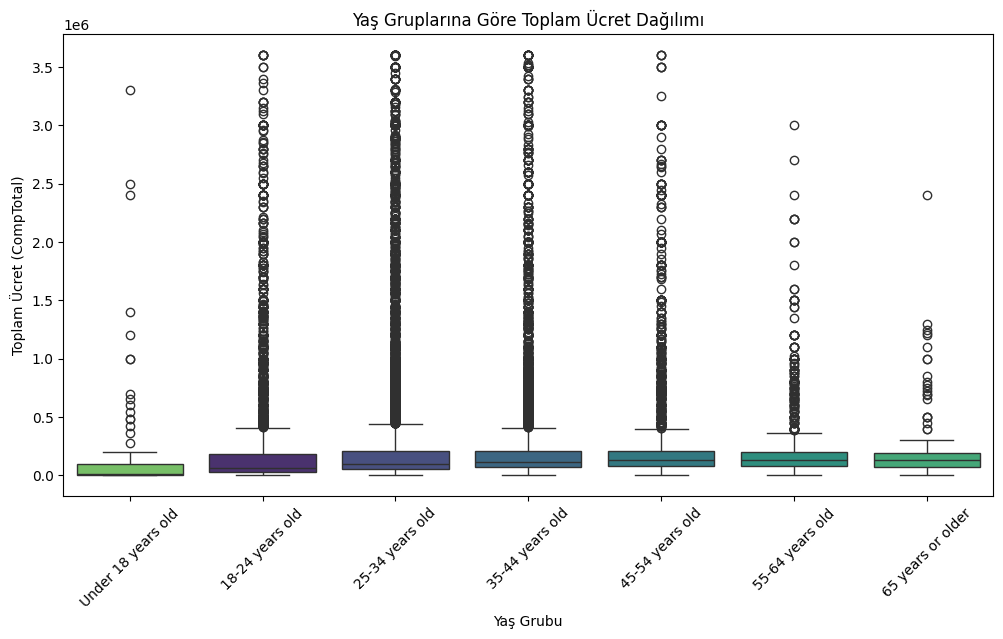

In [36]:

# 1. Veritabanına bağlanalım
conn = sqlite3.connect('survey-results-public.sqlite')

# 2. Verileri çekelim
QUERY = "SELECT Age, CAST(CompTotal AS FLOAT) as CompTotal FROM main WHERE Age IS NOT NULL AND CompTotal IS NOT NULL"
df_age_comp = pd.read_sql_query(QUERY, conn)

# 3. Aykırı değerleri (outliers) temizleyelim (Grafiğin düzgün görünmesi için şart)
limit = df_age_comp['CompTotal'].quantile(0.95)
df_filtered = df_age_comp[df_age_comp['CompTotal'] <= limit]

# 4. Yaş gruplarını mantıklı sıraya dizelim
age_order = ['Under 18 years old', '18-24 years old', '25-34 years old', 
             '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older']

# 5. Görselleştirme
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filtered, x='Age', y='CompTotal',hue ='Age', order=age_order, palette='viridis')

plt.xticks(rotation=45)
plt.title('Yaş Gruplarına Göre Toplam Ücret Dağılımı')
plt.xlabel('Yaş Grubu')
plt.ylabel('Toplam Ücret (CompTotal)')
plt.show()

***2. İş Memnuniyetine Göre Gruplandırılmış Toplam Ücretin Kutu Grafiği (JobSatPoints_6):***

Ücretin iş memnuniyeti düzeylerine göre nasıl değiştiğini inceleyin.

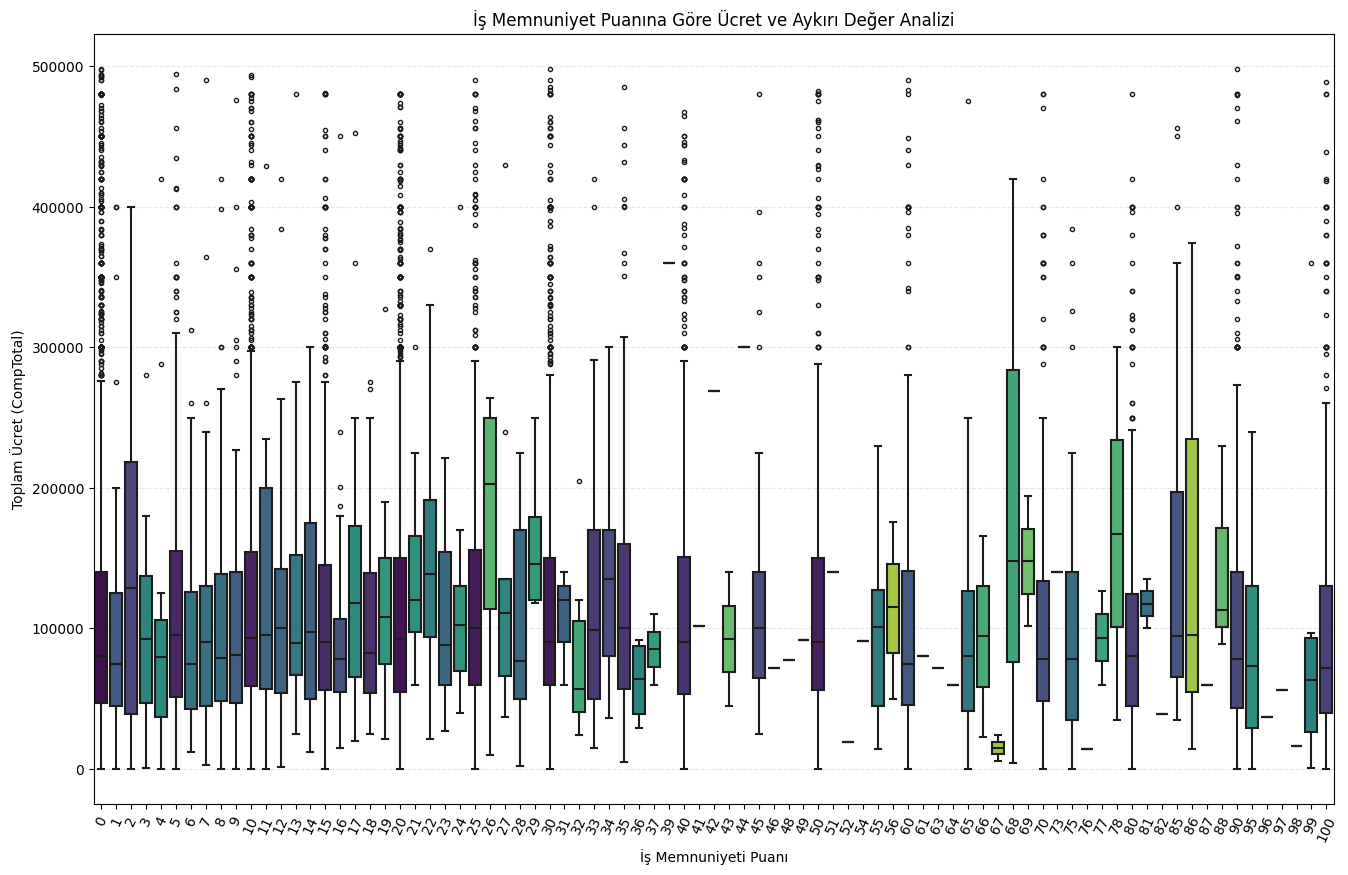

In [37]:

QUERY = "SELECT JobSatPoints_6, CAST(CompTotal AS FLOAT) as CompTotal FROM main WHERE JobSatPoints_6 IS NOT NULL"
df = pd.read_sql_query(QUERY, conn)

# 2. Aykırı değerleri görmek için sınırı biraz daha yukarı çekelim (Örn: 500.000)
# Böylece o 300.000 civarındaki yoğunlaşmayı net görürüz
df_clean = df[df['CompTotal'] < 500000].copy()   #bu ssadyede rakamlar gorunuyor

# 3. Puanları kategorik ve sıralı yapalım
df_clean['JobSatPoints_6'] = df_clean['JobSatPoints_6'].astype(int).astype(str)
points_order = sorted(df_clean['JobSatPoints_6'].unique(), key=int)

# 4. Görselleştirme
plt.figure(figsize=(16, 10)) # Grafiği daha da büyüttük

# fliersize: Noktaların büyüklüğünü küçülterek birbirine girmesini engelleriz
# palette: 'viridis' koyu maviden sarıya (soldan sağa) geçişi sağlar
sns.boxplot(data=df_clean, x='JobSatPoints_6', y='CompTotal', 
            order=points_order, palette='viridis', hue='JobSatPoints_6', fliersize=3, linewidth=1.5)

plt.title('İş Memnuniyet Puanına Göre Ücret ve Aykırı Değer Analizi')
plt.xlabel('İş Memnuniyeti Puanı')
plt.ylabel('Toplam Ücret (CompTotal)')
plt.xticks(rotation=65)
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.show()

"Çok yüksek maaş alsa bile işinden nefret eden bir kitle var" mesajını veriyor. Bu, veri analizinde harika bir bulgudur!

Kategorik Dönüşüm: JobSatPoints_6 puanlarını astype(str) ile metne çevirdiğimiz için Python artık onları 0 ile 100 arasında kayan sayılar olarak değil, yan yana dizilmesi gereken gruplar olarak gördü. Bu da x eksenindeki sıkışmayı çözdü.

# Görev 3: Verilerin Bileşiminin Görselleştirilmesi
***1. En İyi 5 Geliştirici Türü için ConvertedCompYearly'nin Kutu Grafiği:***

En iyi 5 geliştirici rolündeki ücretlendirmeyi analiz edin.

en populer gelişticiciler :  ['Developer, full-stack', 'Developer, back-end', 'Student', 'Developer, front-end', 'Developer, desktop or enterprise applications']
                     DevType  ConvertedCompYearly
0        Developer, back-end              53703.0
1                    Student             110000.0
2      Developer, full-stack             195000.0
3      Developer, full-stack              44586.0
4        Developer, back-end             184712.0
...                      ...                  ...
15637  Developer, full-stack              15637.0
15638  Developer, full-stack               9711.0
15639    Developer, back-end              15600.0
15640  Developer, full-stack             116844.0
15641  Developer, full-stack              12000.0

[15642 rows x 2 columns]


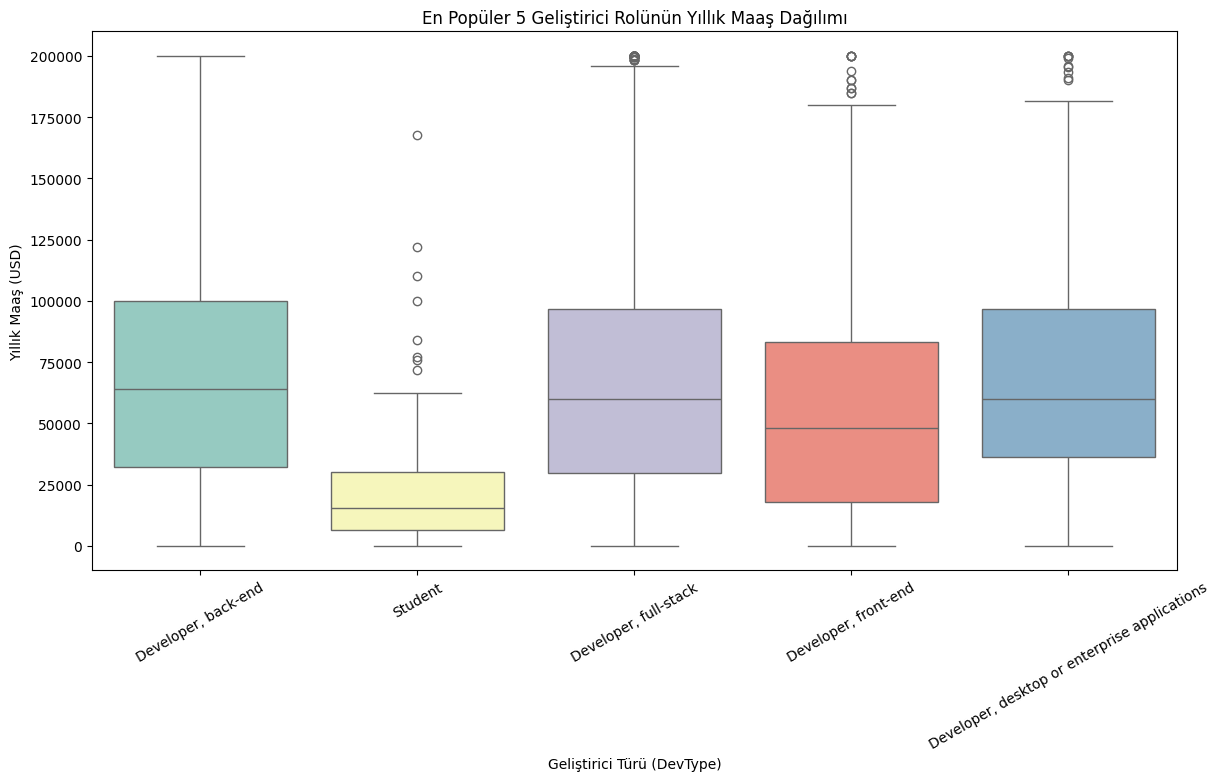

In [38]:

# 1. En popüler 5 geliştirici türünü bulalım
QUERY_TOP5 = """
SELECT DevType, COUNT(*) as Count
FROM main
WHERE DevType IS NOT NULL
GROUP BY DevType
ORDER BY Count DESC
LIMIT 5
"""
top_5_devs = pd.read_sql_query(QUERY_TOP5, conn)['DevType'].tolist()
print('en populer gelişticiciler : ' , top_5_devs)

# 2. Sadece bu 5 türe ait maaş verilerini çekelim
QUERY = f"""
SELECT DevType, ConvertedCompYearly 
FROM main 
WHERE DevType IN ({','.join(['?']*len(top_5_devs))}) 
AND ConvertedCompYearly IS NOT NULL
"""
df_dev_comp = pd.read_sql_query(QUERY, conn, params=top_5_devs)
print(df_dev_comp)

# 3. Aykırı değerleri (outliers) temizleyelim (Daha okunaklı bir grafik için)
limit = df_dev_comp['ConvertedCompYearly'].quantile(0.95)
df_filtered = df_dev_comp[df_dev_comp['ConvertedCompYearly'] <= limit]

# 4. Görselleştirme
plt.figure(figsize=(14, 7))
sns.boxplot(data=df_filtered, x='DevType', hue='DevType', y='ConvertedCompYearly', palette='Set3')

plt.title('En Popüler 5 Geliştirici Rolünün Yıllık Maaş Dağılımı')
plt.xlabel('Geliştirici Türü (DevType)')
plt.ylabel('Yıllık Maaş (USD)')
plt.xticks(rotation=30)
plt.show()

***2. En İyi 5 Ülke İçin Toplam Ücretlerin Kutu Grafiği:***

En iyi 5 ülkedeki katılımcıların ücretlerini analiz edin.

en populer 5 ulkde:  ['United States of America', 'Germany', 'India', 'United Kingdom of Great Britain and Northern Ireland', 'Ukraine']


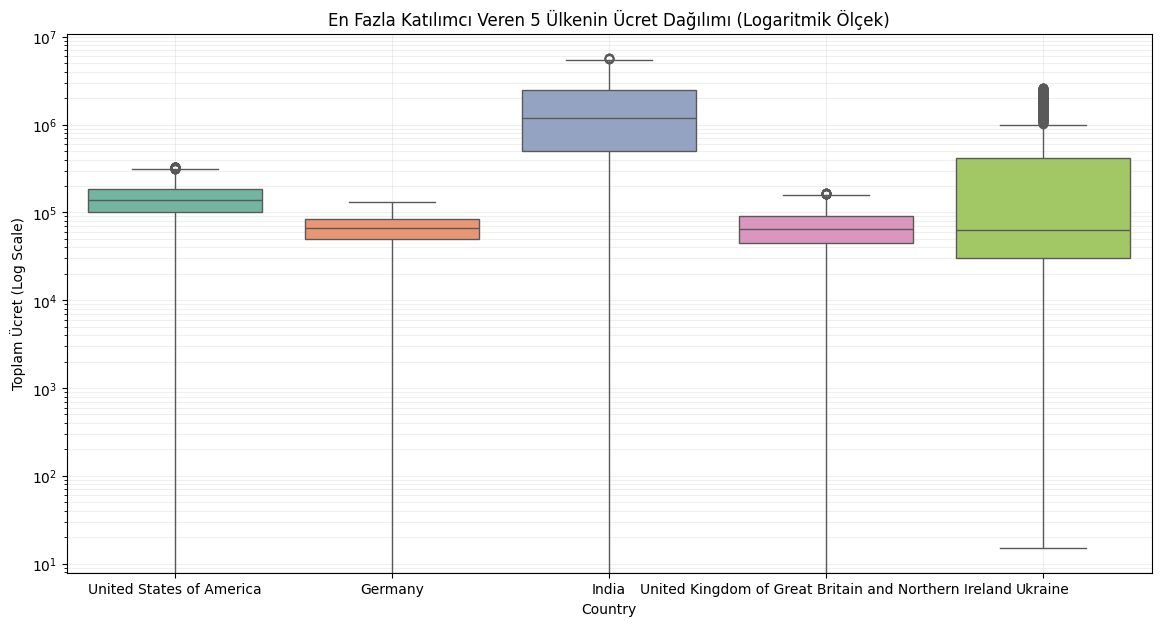

In [39]:

# 1. En çok katılımcısı olan ilk 5 ülkeyi bulalım
QUERY_TOP5_COUNTRY = """
SELECT Country, COUNT(*) as Count
FROM main
WHERE Country IS NOT NULL
GROUP BY Country
ORDER BY Count DESC
LIMIT 5
"""
top_5_countries = pd.read_sql_query(QUERY_TOP5_COUNTRY, conn)['Country'].tolist()
print('en populer 5 ulkde: ', top_5_countries)

# 2. Bu ülkelerin CompTotal verilerini çekelim
QUERY_COUNTRY = f"""
SELECT Country, CAST(CompTotal AS FLOAT) as CompTotal 
FROM main 
WHERE Country IN ({','.join(['?']*len(top_5_countries))})    
AND CompTotal IS NOT NULL
"""
df_country_comp = pd.read_sql_query(QUERY_COUNTRY, conn, params=top_5_countries)

#3 Her ülke için %95'lik dilimi alıp bir listeye ekliyoruz
frames = []
for country in top_5_countries:
    temp_df = df_country_comp[df_country_comp['Country'] == country]
    if not temp_df.empty:
        limit = temp_df['CompTotal'].quantile(0.95)
        filtered_df = temp_df[temp_df['CompTotal'] <= limit]
        frames.append(filtered_df)

# Tüm parçaları tek bir temiz DataFrame'de birleştirelim
df_final = pd.concat(frames).reset_index(drop=True)

# 4. Görselleştirme
plt.figure(figsize=(14, 7))

sns.boxplot(data=df_final, x='Country', hue='Country', y='CompTotal', palette='Set2')

# Y eksenini logaritmik yaparak kutuları görünür hale getiriyoruz
plt.yscale('log') 

plt.title('En Fazla Katılımcı Veren 5 Ülkenin Ücret Dağılımı (Logaritmik Ölçek)')
plt.ylabel('Toplam Ücret (Log Scale)')
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.show()

Logaritmik ölçek (plt.yscale('log')) kullanmak harika bir fikir çünkü Hindistan'daki milyonluk Rupi değerleri ile Almanya veya ABD'deki binlik değerleri aynı kareye sığdırmanın tek yolu bu.  dohhru sutun doonustuırlmus geli sutunu olamsı lazım ama

# Görev 4: Verilerin Karşılaştırılmasının Görselleştirilmesi
***1. İstihdam Türlerine Göre Toplam Ücretin Kutu Grafiği:***

Farklı istihdam türleri için ücretleri analiz edin.

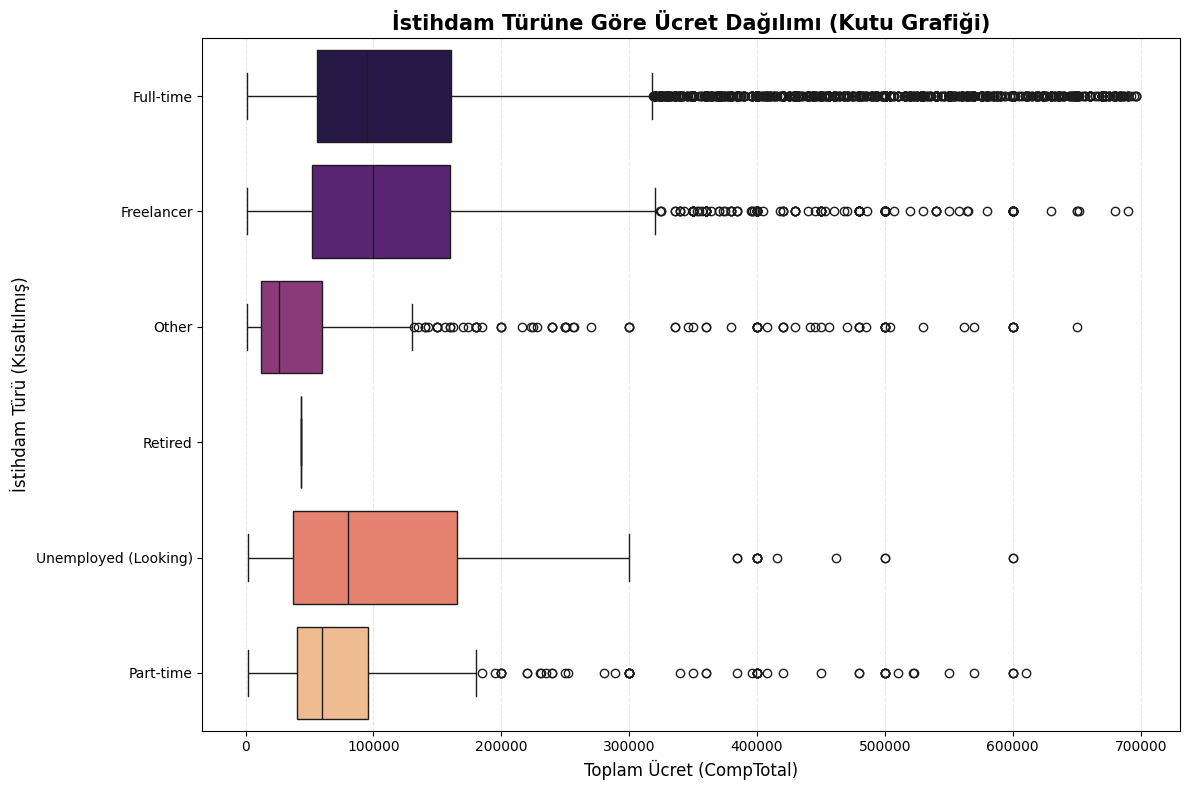

In [50]:

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Veriyi SQL ile çekelim
conn = sqlite3.connect('survey-results-public.sqlite')
QUERY = "SELECT Employment, CAST(CompTotal AS FLOAT) as CompTotal FROM main WHERE Employment IS NOT NULL AND CompTotal > 0"
df_emp = pd.read_sql_query(QUERY, conn)

# 2. İsimleri Kısaltalım (Mapping)
# Bu sözlük, uzun cümleleri grafik dostu kısa kelimelere çevirir.
short_emp_names = {
    'Employed, full-time': 'Full-time',
    'Independent contractor, freelancer, or self-employed': 'Freelancer',
    'Employed, part-time': 'Part-time',
    'I prefer not to say': 'Other',
    'Retired': 'Retired',
    'Not employed, but looking for work': 'Unemployed (Looking)',
    'Not employed, and not looking for work': 'Not Working'
}

# Sütundaki uzun metinleri split edip (noktalı virgül varsa) kısaltıyoruz
df_emp['Employment_Short'] = df_emp['Employment'].str.split(';').str[0].map(short_emp_names).fillna('Other')

# 3. Ücret Filtreleme (Kutuları net görmek için uç değerleri temizleyelim)
# %90'lık dilim yerine $10k - $250k arası sabit bir aralık da kutuları çok netleştirir
df_filtered = df_emp[(df_emp['CompTotal'] > 1000) & (df_emp['CompTotal'] < df_emp['CompTotal'].quantile(0.85))]

# 4. Görselleştirme: Yatay Kutu Grafiği
plt.figure(figsize=(12, 8))



sns.boxplot(data=df_filtered, x='CompTotal', y='Employment_Short', 
            hue='Employment_Short', palette='magma', legend=False)

plt.title('İstihdam Türüne Göre Ücret Dağılımı (Kutu Grafiği)', fontsize=15, fontweight='bold')
plt.xlabel('Toplam Ücret (CompTotal)', fontsize=12)
plt.ylabel('İstihdam Türü (Kısaltılmış)', fontsize=12)
plt.grid(axis='x', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

conn.close()

***2. İş Memnuniyetine Göre Profesyonel Kodlama Yıllarının Kutu Grafiği (JobSatPoints_6):***

Profesyonel kodlama yıllarının iş memnuniyeti düzeylerine göre dağılımını inceleyin.

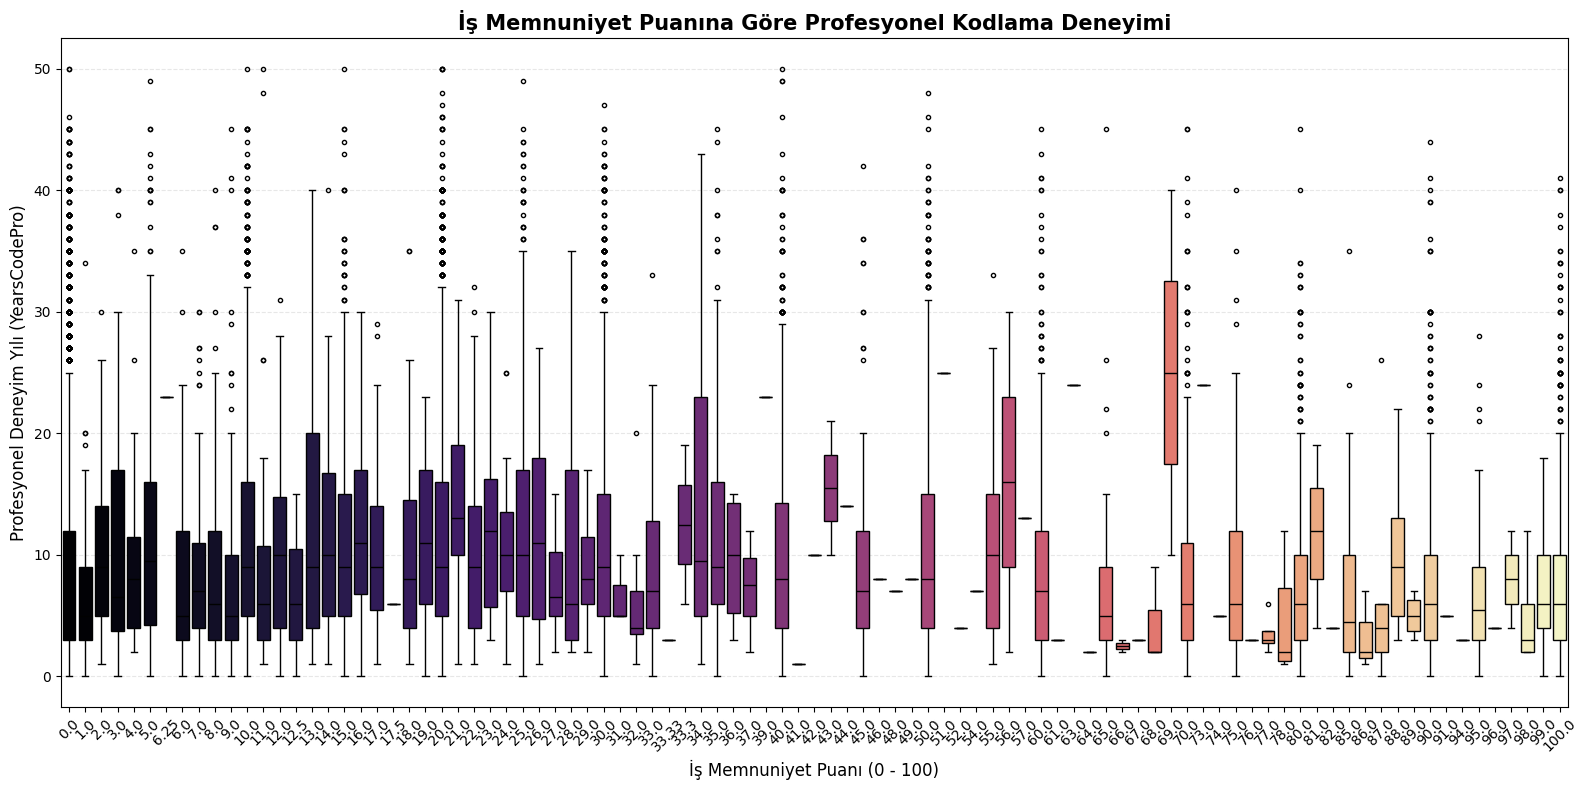

In [53]:
# Profesyonel kodlama yılları (YearsCodePro) ve memnuniyet puanını çekiyoruz
QUERY = "SELECT JobSatPoints_6, YearsCodePro FROM main WHERE JobSatPoints_6 IS NOT NULL AND YearsCodePro IS NOT NULL"
df_sat_exp = pd.read_sql_query(QUERY, conn)

# 2. YearsCodePro sütununu sayısal hale getirelim (Metinleri sayıya çevirme)
def clean_years(x):
    if x == 'Less than 1 year': return 0
    if x == 'More than 50 years': return 50
    try:
        return float(x)
    except:
        return None

df_sat_exp['YearsCodePro_Numeric'] = df_sat_exp['YearsCodePro'].apply(clean_years)
df_sat_exp = df_sat_exp.dropna() # Sayıya çevrilemeyenleri temizle

# 3. Puanları sıralayalım (X ekseni düzeni için)
points_order = sorted(df_sat_exp['JobSatPoints_6'].unique(), key=lambda x: int(float(x)))

# 4. Görselleştirme
plt.figure(figsize=(16, 8))

sns.boxplot(data=df_sat_exp, x='JobSatPoints_6', y='YearsCodePro_Numeric', 
            order=points_order, hue='JobSatPoints_6', palette='magma', 
            legend=False, fliersize=3)

plt.title('İş Memnuniyet Puanına Göre Profesyonel Kodlama Deneyimi', fontsize=15, fontweight='bold')
plt.xlabel('İş Memnuniyet Puanı (0 - 100)', fontsize=12)
plt.ylabel('Profesyonel Deneyim Yılı (YearsCodePro)', fontsize=12)

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

In [52]:
conn.close()

Özet
Bu laboratuvar çalışmasında, veri setinin çeşitli yönlerini görselleştirmek için kutu grafikleri kullandınız ve şunlara odaklandınız:

Ücret ve yaş dağılımlarını görselleştirme.

Ücret, iş memnuniyeti ve profesyonel kodlama deneyimi arasındaki ilişkileri inceleme.

Geliştirici rolleri ve ülkeler genelinde veri bileşimini analiz etme.

İş türleri ve memnuniyet düzeyleri genelinde ücretleri karşılaştırma.

Kutu grafikleri, veri setindeki çeşitli özelliklerin yayılımı, aykırı değerleri ve merkezi eğilimleri hakkında net bilgiler sağladı.

In [43]:
print(df.columns.tolist())

['JobSatPoints_6', 'CompTotal']
